### Počítání gamma a predikcí pro různé koncentrace H a He

In [1]:
import pickle as pc
import numpy as np
import matplotlib.pyplot as pp

In [2]:
with open("../../dataShare/gamma_experimental.pickle","rb") as file:
    database = pc.load(file)
d1, d2 = [], []
for arr in database:
    arr[1] = arr[1][0][0]
    arr[6] = arr[6][0][0]
    if arr[0] == '1':
        d1.append(arr)
    else:
        d2.append(arr)

##### Simulace a predikce
Na grafu níže je zobrazena predikce a) podle Stangebyho 25.46:
  $$
  \gamma \approx \frac{2.5\tau}{Z_{eff}} + \frac{2}{1-\delta_e}-0.5 \ln \left[ \left(2\pi\frac{m_e}{m_i}\right) \left(Z_{eff}+\tau\right)(1-\delta_e)^{-2} \right]
  $$
b) i s potenciálem 25.54:
    $$
      \gamma \approx - \frac{eV}{kT_e} + \frac{2.5\tau}{Z_{eff}} + 2 \left[ \left(2\pi\frac{m_e}{m_i}\right) \left(Z_{eff}+\tau\right) \right]^{-\frac{1}{2}}\cdot \exp{\frac{eV}{kT_e}}
  $$
Se zadaným potenciálem (-5) jsem počítal jako s $\frac{eV}{kT_e}$.
Je vidět, že pro vysoká $\tau$ se predikce výrazně liší od simulace. Predikce jsou nejspíš spočítané správně (viz graf na matletu ve srovnání se Stangebym fig. 25.12, kde docházím k podobným průběhům a hodnotám). Zkoušel jsem počítat gamma v simulaci i ve starých noteboocích, výsledky ale byly stejné.

In [3]:
def get_serie_T(tau, type):
    result = []
    if type == 1:
        for d in d1:
            if d[1]==tau:
                result.append([d[5], d[6]])
    elif type == 2:
        for d in d2:
            if d[1]==tau:
                result.append([d[5], d[6]])
    result = np.array(result)
    return result

In [4]:
def get_serie_C(conc, type):
    result = []
    if type == 1:
        for d in d1:
            if d[2]==conc:
                result.append([d[5], d[6]])
    elif type == 2:
        for d in d2:
            if d[2]==conc:
                if conc==0.98 and d[1]==1:print(f"Tau 1 k 0.98 real: {d[5]}, predict:{d[6]}")
                result.append([d[5], d[6]])
    result = np.array(sorted(result, key=lambda x: x[1]))
    return result

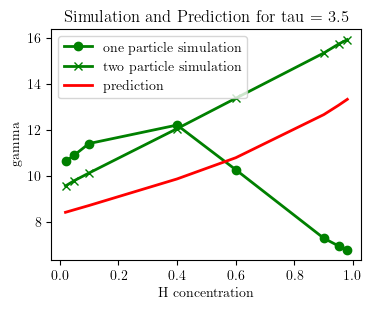

In [5]:
# plot with given tau
# tau = [0.5, 1.0, 3.5, 5.0]

tau = 3.5

def plot_tau(tau):
    x = [0.02, 0.05, 0.1, 0.4, 0.6, 0.9, 0.95, 0.98]
    pp.figure(figsize=(4,3))
    pp.plot(x, get_serie_T(tau,1)[:,0], linewidth=2, label="one particle simulation", marker='o', c='g')
    pp.plot(x, get_serie_T(tau,2)[:,0], linewidth=2, label="two particle simulation", marker='x', c='g')
    pp.plot(x, get_serie_T(tau,1)[:,1], linewidth=2, label="prediction", c='r')
    pp.legend()
    pp.xlabel('H concentration')
    pp.ylabel('gamma')
    pp.title(f"Simulation and Prediction for tau = {tau}")

plot_tau(tau)

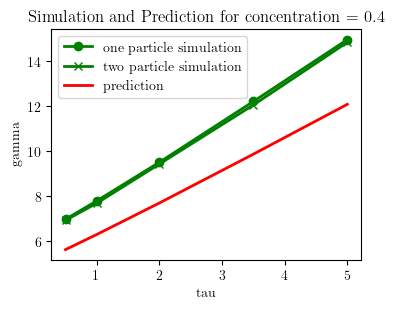

In [6]:
# plot with given tau
# conc = [0.02, 0.05, 0.1, 0.4, 0.6, 0.9, 0.95, 0.98]

conc = 0.4

def plot_conc(conc):
    x = [0.5, 1.0, 2.0, 3.5, 5.0]
    pp.figure(figsize=(4,3))
    pp.plot(x, get_serie_C(conc,1)[:,0], linewidth=2, label="one particle simulation", marker='o', c='g')
    pp.plot(x, get_serie_C(conc,2)[:,0], linewidth=2, label="two particle simulation", marker='x', c='g')
    pp.plot(x, get_serie_C(conc,1)[:,1], linewidth=2, label="prediction", c='r')
    pp.legend()
    pp.xlabel('tau')
    pp.ylabel('gamma')
    pp.title(f"Simulation and Prediction for concentration = {conc}")

plot_conc(conc)

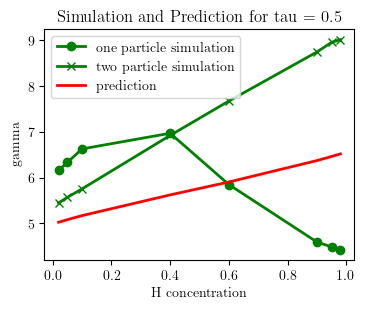

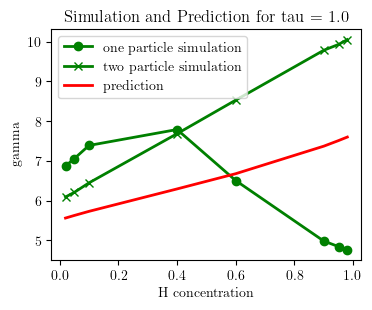

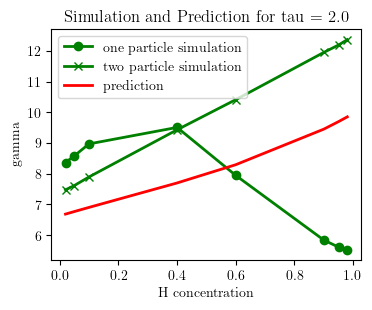

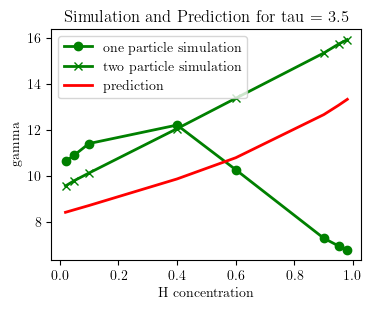

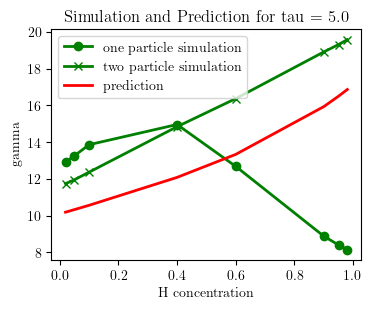

In [7]:
plot_tau(0.5)
plot_tau(1.0)
plot_tau(2.0)
plot_tau(3.5)
plot_tau(5.0)

Tau 1 k 0.98 real: 10.054149892206127, predict:6.945168090037244


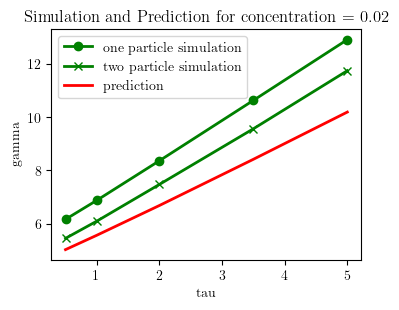

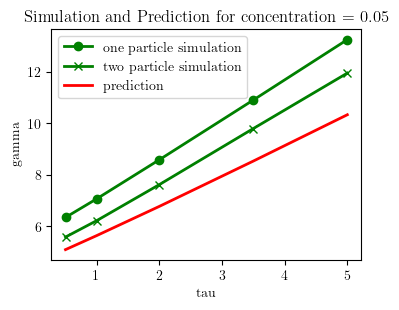

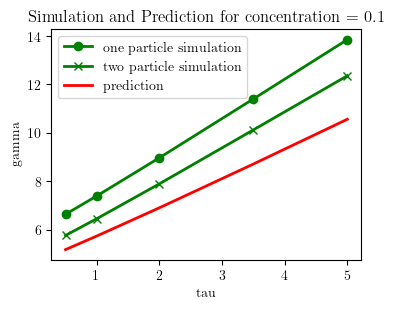

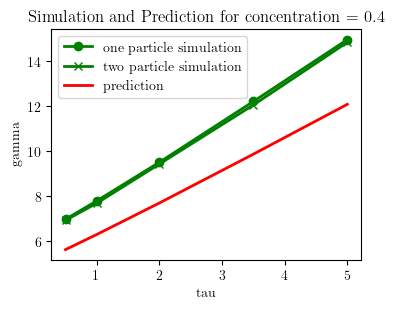

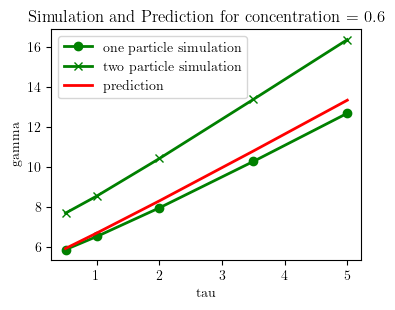

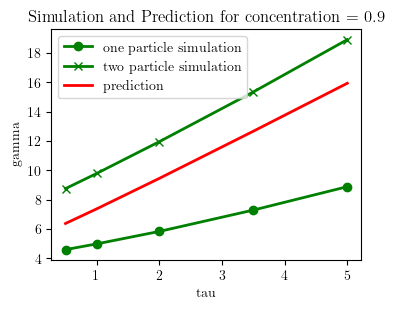

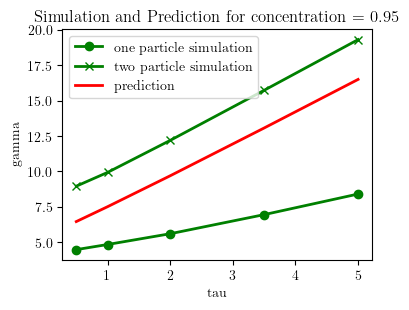

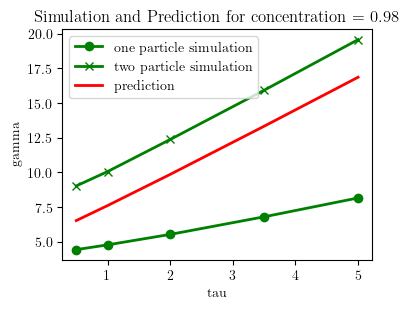

In [8]:
plot_conc(0.02)
plot_conc(0.05)
plot_conc(0.1)
plot_conc(0.4)
plot_conc(0.6)
plot_conc(0.9)
plot_conc(0.95)
plot_conc(0.98)

Tau 1 k 0.98 real: 10.054149892206127, predict:6.945168090037244


Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Co

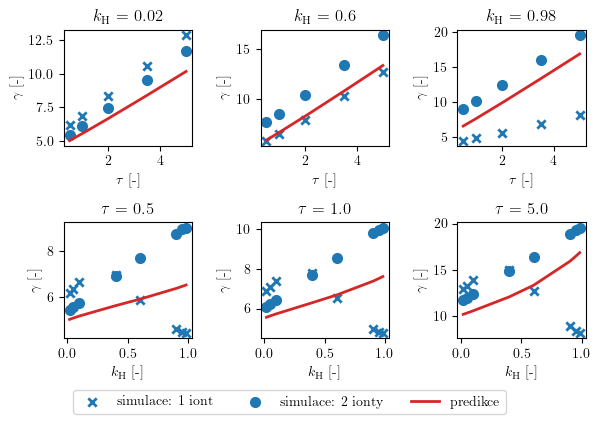

In [12]:
def plot_conc2(ax, conc):
    x = [0.5, 1.0, 2.0, 3.5, 5.0]
    ax.scatter(x, get_serie_C(conc,1)[:,0], linewidth=2, label="simulace: 1 iont", marker='x', c='tab:blue')
    ax.scatter(x, get_serie_C(conc,2)[:,0], linewidth=2, label="simulace: 2 ionty", marker='o', c='tab:blue')
    ax.plot(x, get_serie_C(conc,1)[:,1], linewidth=2, label="predikce", c='tab:red')
    #ax.legend()
    ax.set_xlabel(r'$\tau$ [-]')
    ax.set_ylabel(r'$\gamma$ [-]')
    ax.set_title(r"$k_\mathrm{H}$"+f" = {conc}")

def plot_tau2(ax, tau):
    x = [0.02, 0.05, 0.1, 0.4, 0.6, 0.9, 0.95, 0.98]
    ax.scatter(x, get_serie_T(tau,1)[:,0], linewidth=2, label="simulace: 1 iont", marker='x', c='tab:blue')
    ax.scatter(x, get_serie_T(tau,2)[:,0], linewidth=2, label="simulace: 2 ionty", marker='o', c='tab:blue')
    ax.plot(x, get_serie_T(tau,1)[:,1], linewidth=2, label="predikce", c='tab:red')
    #ax.legend()
    ax.set_xlabel(r'$k_\mathrm{H}$ [-]')
    ax.set_ylabel(r'$\gamma$ [-]')
    ax.set_title(fr'$\tau$ = {tau}')

fig, ax = pp.subplots(2, 3, figsize=(6,4))
plot_conc2(ax[0,0], 0.02)
plot_conc2(ax[0,1], 0.6)
plot_conc2(ax[0,2], 0.98)
plot_tau2(ax[1,0], 0.5)
plot_tau2(ax[1,1], 1.0)
plot_tau2(ax[1,2], 5.0)
pp.tight_layout()
pp.legend(loc=(-3,-0.65), ncol=3)
pp.savefig('/home/jachym/Temporary/graph_export/GammaSim.pgf', format='pgf', bbox_inches='tight')
pp.show()

Tau 1 k 0.98 real: 10.054149892206127, predict:6.945168090037244


Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Co

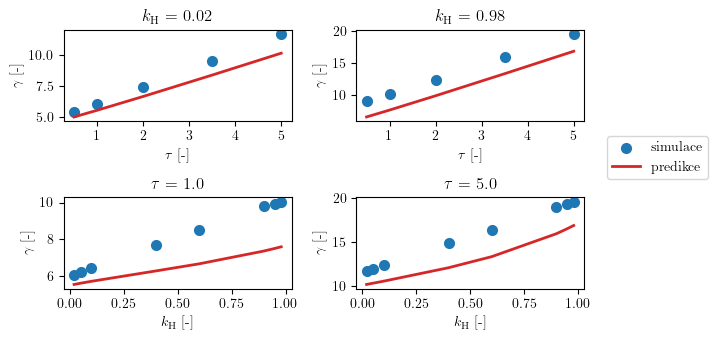

In [20]:
def plot_conc2(ax, conc):
    x = [0.5, 1.0, 2.0, 3.5, 5.0]
    ax.scatter(x, get_serie_C(conc,2)[:,0], linewidth=2, label="simulace", marker='o', c='tab:blue')
    ax.plot(x, get_serie_C(conc,1)[:,1], linewidth=2, label="predikce", c='tab:red')
    #ax.legend()
    ax.set_xlabel(r'$\tau$ [-]')
    ax.set_ylabel(r'$\gamma$ [-]')
    ax.set_title(r"$k_\mathrm{H}$"+f" = {conc}")

def plot_tau2(ax, tau):
    x = [0.02, 0.05, 0.1, 0.4, 0.6, 0.9, 0.95, 0.98]
    ax.scatter(x, get_serie_T(tau,2)[:,0], linewidth=2, label="simulace", marker='o', c='tab:blue')
    ax.plot(x, get_serie_T(tau,1)[:,1], linewidth=2, label="predikce", c='tab:red')
    #ax.legend()
    ax.set_xlabel(r'$k_\mathrm{H}$ [-]')
    ax.set_ylabel(r'$\gamma$ [-]')
    ax.set_title(fr'$\tau$ = {tau}')

fig, ax = pp.subplots(2, 2, figsize=(6,3.5))
plot_conc2(ax[0,0], 0.02)
plot_conc2(ax[0,1], 0.98)
plot_tau2(ax[1,0], 1.0)
plot_tau2(ax[1,1], 5.0)
pp.tight_layout()
pp.legend(loc=(1.1,1.2))
pp.savefig('/home/jachym/Temporary/graph_export/GammaSimForPres.pgf', format='pgf', bbox_inches='tight')
pp.show()